In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
train = pd.read_csv('train.csv')
train.drop_duplicates()
train = train.fillna('None')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


In [39]:
thingy = train
type(thingy)

pandas.core.frame.DataFrame

In [40]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [41]:
featured_cols = ['MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'TotalBsmtSF', 'Electrical', '1stFlrSF', '2ndFlrSF', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'GarageType', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition']
new_cols = ['LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
pos = ['LotArea', 'TotalBsmtSF', '1stFlrSF', 'WoodDeckSF', '3SsnPorch', 'ScreenPorch']
x = train[featured_cols]
y = train['SalePrice']

In [42]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [43]:
thingy.loc[thingy.SalePrice <= 132107, 'SalePrice'] = 0
thingy.loc[(thingy.SalePrice <= 232669) & (thingy.SalePrice > 132107), 'SalePrice'] = 1
thingy.loc[(thingy.SalePrice <= 755000) & (thingy.SalePrice > 232669), 'SalePrice'] = 2
thingy['SalePrice']

0       1
1       1
2       1
3       1
4       2
       ..
1455    1
1456    1
1457    2
1458    1
1459    1
Name: SalePrice, Length: 1460, dtype: int64

In [44]:
x = pd.get_dummies(x)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, thingy['SalePrice'], test_size=0.3, random_state=1)
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
#y_train = ss.fit_transform(y_train)
#y_test = ss.fit_transform(y_test)

In [46]:
clf = tree.DecisionTreeClassifier(max_depth = 4)

clf = clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

In [47]:
metrics.confusion_matrix(Y_test, y_pred)

array([[ 91,  38,   0],
       [ 31, 186,  11],
       [  1,  19,  61]], dtype=int64)

In [48]:
print('Accuracy:', metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.771689497716895


In [15]:
clr = tree.DecisionTreeRegressor()

clr = clr.fit(x_train, y_train)

y_pred2 = clr.predict(x_test)

In [16]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.01141552511415525


In [17]:
metrics.mean_squared_error(y_test, y_pred2)

2759994539.714612

In [18]:
metrics.mean_absolute_error(y_test, y_pred2)

29681.74200913242

In [76]:
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [261]:
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [263]:
train['SalePrice'].unique()

array([0, 1, 2], dtype=int64)

[Text(2117.3439895394094, 1335.5689655172414, 'X[1] <= 1.013\nmse = 5948676068.008\nsamples = 1022\nvalue = 181438.534'),
 Text(1615.7960351557479, 1288.7068965517242, 'X[1] <= 0.275\nmse = 2410383951.867\nsamples = 866\nvalue = 159947.335'),
 Text(999.3132741592318, 1241.844827586207, 'X[1] <= -0.463\nmse = 1380745078.183\nsamples = 633\nvalue = 142141.531'),
 Text(615.259711942059, 1194.9827586206898, 'X[4] <= -0.119\nmse = 822613360.104\nsamples = 357\nvalue = 126684.476'),
 Text(318.30977176162804, 1148.1206896551726, 'X[1] <= -1.201\nmse = 636096067.411\nsamples = 241\nvalue = 117660.369'),
 Text(96.5198107628622, 1101.2586206896551, 'X[5] <= -1.071\nmse = 547312714.43\nsamples = 73\nvalue = 99543.301'),
 Text(45.14539891497185, 1054.396551724138, 'X[13] <= 0.331\nmse = 427515061.728\nsamples = 18\nvalue = 76877.778'),
 Text(35.19810762862212, 1007.5344827586207, 'X[182] <= 1.805\nmse = 258653125.0\nsamples = 16\nvalue = 71925.0'),
 Text(24.485640089476256, 960.6724137931035, 'X[1

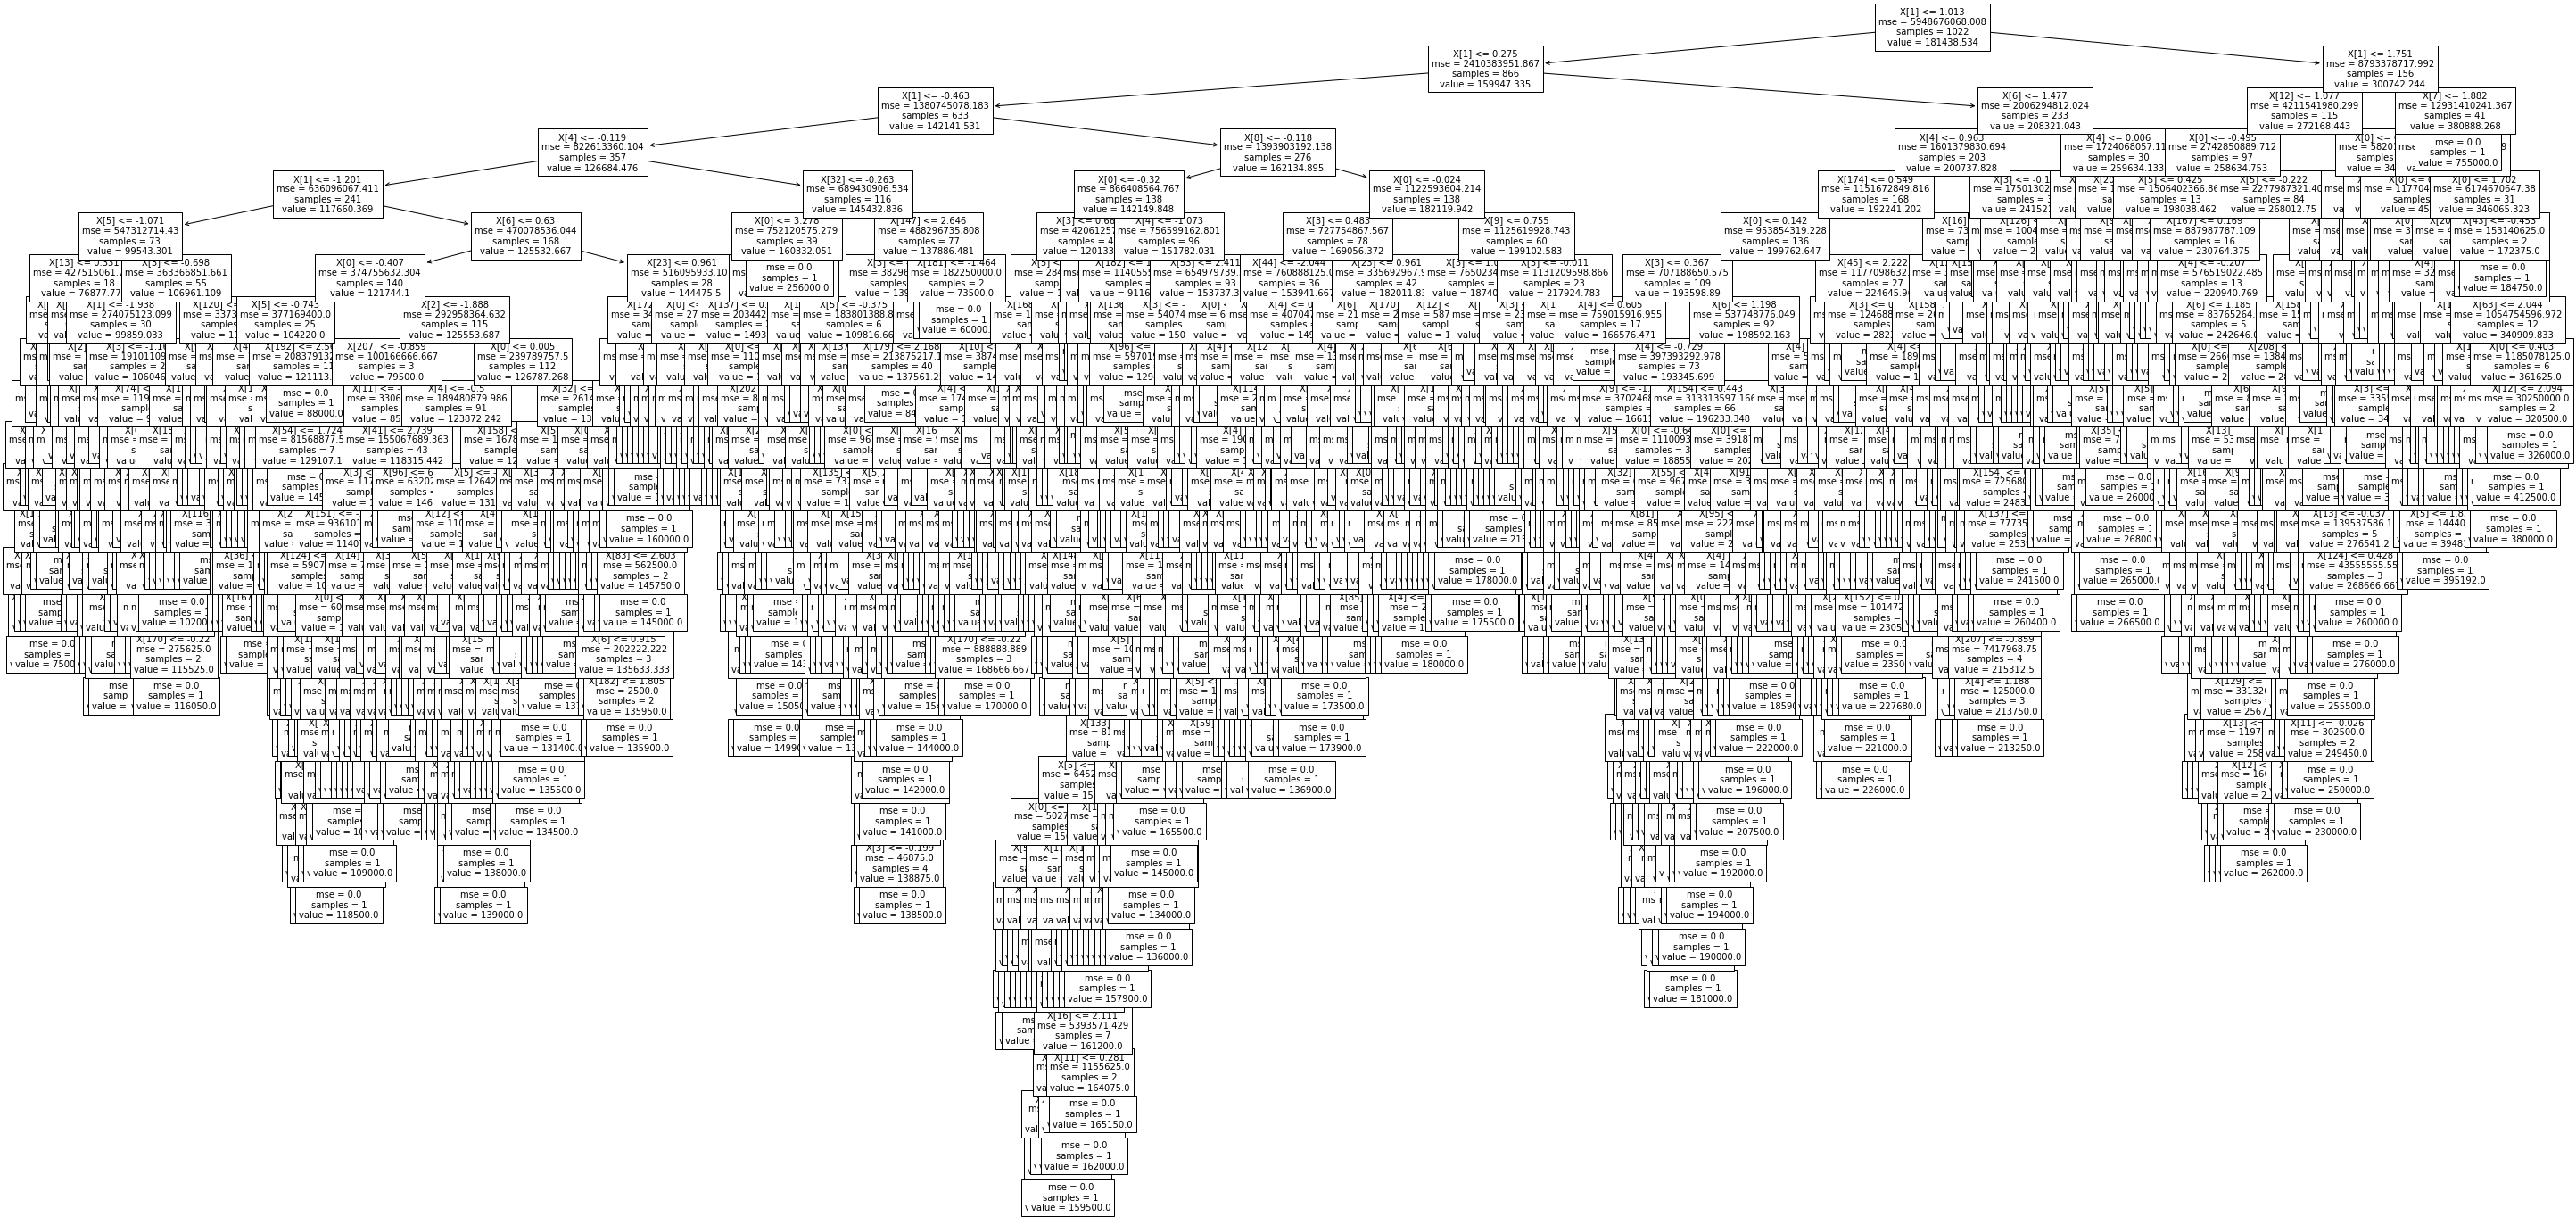

In [19]:
plt.figure(figsize=(50,25))
tree.plot_tree(clr, fontsize=10)

[Text(1135.9285714285713, 733.86, 'X[1] <= 1.013\ngini = 0.598\nsamples = 1022\nvalue = [264, 557, 201]'),
 Text(637.7142857142857, 570.78, 'X[1] <= -0.463\ngini = 0.529\nsamples = 866\nvalue = [263, 528, 75]'),
 Text(318.85714285714283, 407.70000000000005, 'X[4] <= -0.036\ngini = 0.495\nsamples = 357\nvalue = [200, 156, 1]'),
 Text(159.42857142857142, 244.62, 'X[0] <= 0.085\ngini = 0.421\nsamples = 259\nvalue = [181, 78, 0]'),
 Text(79.71428571428571, 81.54000000000008, 'gini = 0.358\nsamples = 227\nvalue = [174, 53, 0]'),
 Text(239.1428571428571, 81.54000000000008, 'gini = 0.342\nsamples = 32\nvalue = [7, 25, 0]'),
 Text(478.2857142857142, 244.62, 'X[3] <= -0.432\ngini = 0.329\nsamples = 98\nvalue = [19, 78, 1]'),
 Text(398.57142857142856, 81.54000000000008, 'gini = 0.522\nsamples = 33\nvalue = [14, 18, 1]'),
 Text(558.0, 81.54000000000008, 'gini = 0.142\nsamples = 65\nvalue = [5, 60, 0]'),
 Text(956.5714285714284, 407.70000000000005, 'X[23] <= 0.961\ngini = 0.429\nsamples = 509\nval

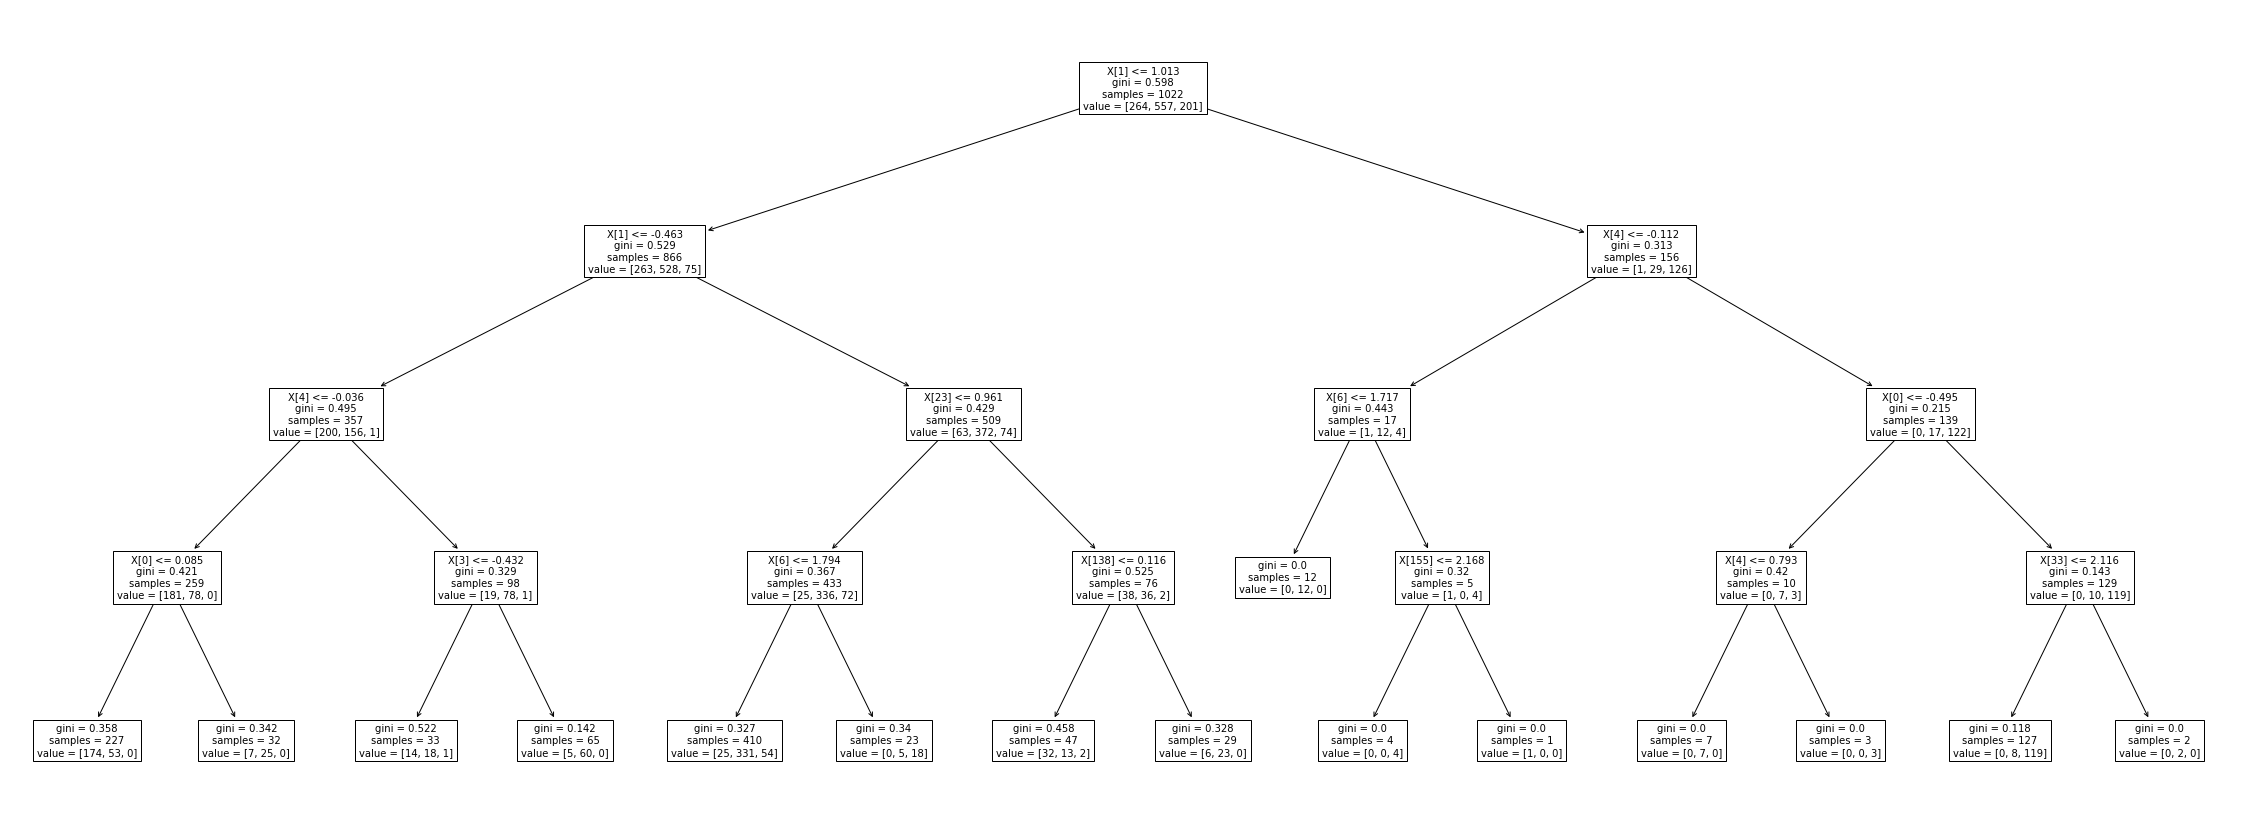

In [26]:
plt.figure(figsize=(40,15))
tree.plot_tree(clf, fontsize=10)